### Intro

This notebook shows the step-by-step procedure performed by the `disha-analyzer` command.

### Imports

In [1]:
from disha.Pipeline import crop_assay,extract_grids,analyze_image,show_image,export_grid_image
from disha import Pipeline
from glob import glob
from os.path import join
from disha.Experiment import Experiment
from disha.utils import extract_bait_number
from disha.SegmentationModel import SegmentationModel
import cv2
%matplotlib inline
Pipeline.debug = True

Segmentation Models: using `keras` framework.


### Data Retrieval

Download `Experiment_Root` and `model_weights` from https://drive.google.com/drive/folders/1oZFCNsfJE_BUgq3KdY4buXx3_B-0tXht?usp=sharing
and put them in the same folder as this notebook.

**The following two cell assumes \*nix operating system. If you are using windows, please perform these steps manually.**

In [ ]:
#Download Experiment root folder and model_weights zipped from google drive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1TiwuXHMvBj0nHgLyfYBwp2fCbzuLBbay' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1TiwuXHMvBj0nHgLyfYBwp2fCbzuLBbay" -O data.zip && rm -rf /tmp/cookies.txt
#Unzip folders 
!unzip data.zip
!rm data.zip

In [3]:

!tree -L 3 

.
├── Experiment_Root
│   ├── Ex1
│   │   ├── AB_HetY1Hpilot3-1_1-4_5mm_3AT_X-gal_3d.JPG
│   │   ├── AB_HetY1Hpilot3-4_1-4_5mm_3AT_X-gal_9d.JPG
│   │   ├── AB_HetY1Hpilot3-5_1-4_5mm_3AT_X-gal_9d.JPG
│   │   ├── AB_HetY1Hpilot3-7_1-4_5mm_3AT_X-gal_5d.JPG
│   │   ├── AB_HetY1Hpilot3-8_1-4_5mm_3AT_X-gal_9d.JPG
│   │   ├── AB_HetY1Hpilot3-9_1-4_5mm_3AT_X-gal_7d.JPG
│   │   ├── HetY1H Pilot TF coordinates - 2AD.xlsx
│   │   └── output
│   └── Ex2
│       ├── AB_HetY1Hpilot3-11_1-4_5mm_3AT_X-gal_9d.JPG
│       ├── AB_HetY1Hpilot3-12_1-4_5mm_3AT_X-gal_2d.JPG
│       ├── AB_HetY1Hpilot3-13_1-4_5mm_3AT_X-gal_9d.JPG
│       ├── AB_HetY1Hpilot3-16_1-4_5mm_3AT_X-gal_5d.JPG
│       ├── AB_HetY1Hpilot3-17_1-4_5mm_3AT_X-gal_9d.JPG
│       ├── AB_HetY1Hpilot3-20_1-4_5mm_3AT_X-gal_9d.JPG
│       └── HetY1H Pilot TF coordinates - 2AD.xlsx
├── assay_sample.gif
├── demo_notebook.ipynb
├── model_weights
│   ├── checkpoint
│   ├── latest_1351.ckpt.data-00000-of-00001
│   └── latest_1351.ckpt.index
└── tree_

### Load Experiment
We here work with single image for the demonstration purposes. However, the main script automatically scales with any number of images.

In [ ]:
images=['./Experiment_Root/Ex1/AB_HetY1Hpilot3-4_1-4_5mm_3AT_X-gal_9d.JPG']
datasheet='./Experiment_Root/Ex1/HetY1H Pilot TF coordinates - 2AD.xlsx'
experiment = Experiment(bait='4',images=images,datasheet=datasheet,base_path='./Experiment_Root/Ex1')
model = SegmentationModel('efficientnetb1',weights_path='./model_weights/')

### Initial Input Image

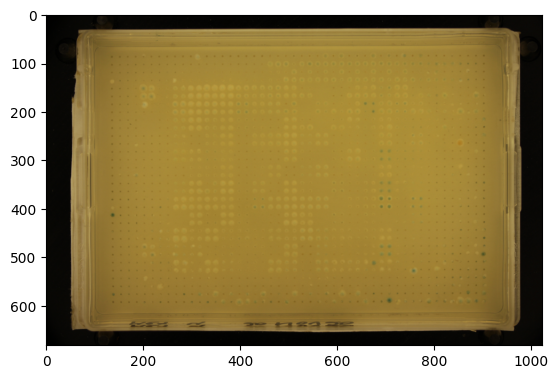

In [5]:
for image_object in experiment.images:
    show_image(image_object.image)

### Crop Images
Perform initial boundary cropping.

Projection analysis for initial boundary cropping.


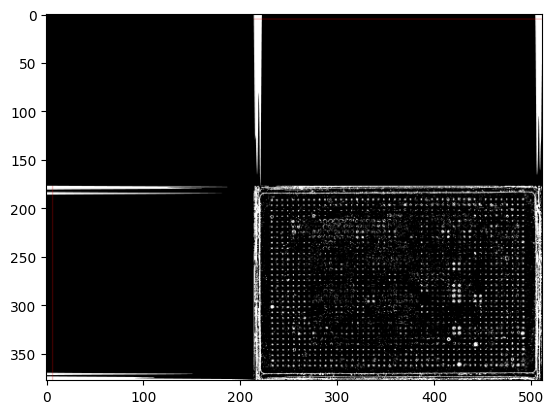

Output Image


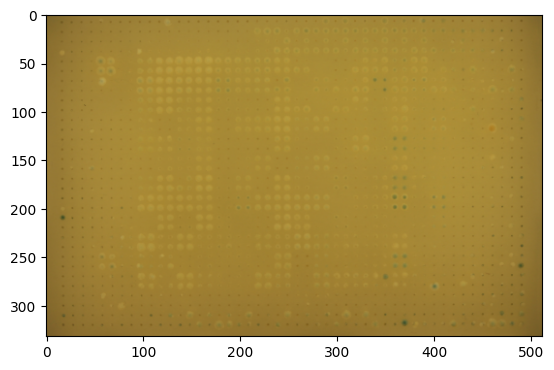

In [6]:
# apply_funct runs the parameter function on all the images included in the experiment object and return result.
# crop_assay modifies the images directly and does not return any data.

for _ in experiment.apply_funct(crop_assay):
    pass

print("Projection analysis for initial boundary cropping.")
show_image(cv2.imread('./Experiment_Root/Ex1/output/AB_HetY1Hpilot3-4_1-4_5mm_3AT_X-gal_9d/crop_AB_HetY1Hpilot3-4_1-4_5mm_3AT_X-gal_9d_projection.jpg'),512)
print("Output Image")
for image_object in experiment.images:
    show_image(image_object.image,512)


### Grid Generation

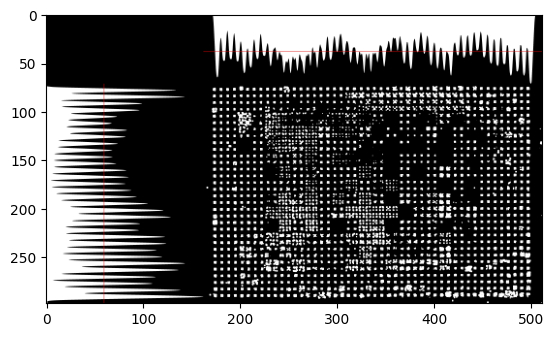

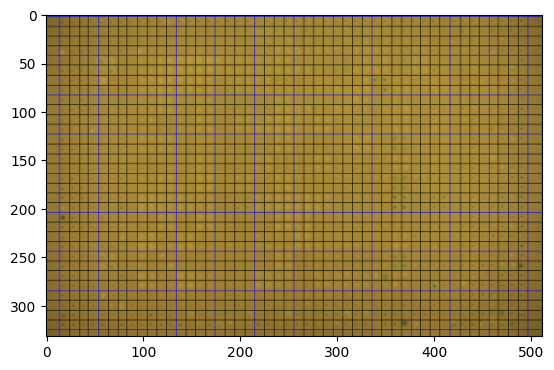

In [7]:
for image, grid in experiment.apply_funct(extract_grids):
    image.set_grid(*grid)

show_image(cv2.imread('./Experiment_Root/Ex1/output/AB_HetY1Hpilot3-4_1-4_5mm_3AT_X-gal_9d/AB_HetY1Hpilot3-4_1-4_5mm_3AT_X-gal_9d_projection.jpg'),512)

for image, output in experiment.apply_funct(export_grid_image):
    show_image(output,512)

### Segmentation

2023-07-09 15:35:06.236835: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8600
2023-07-09 15:35:06.311013: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


6/6 [==============================] - 5s 322ms/step


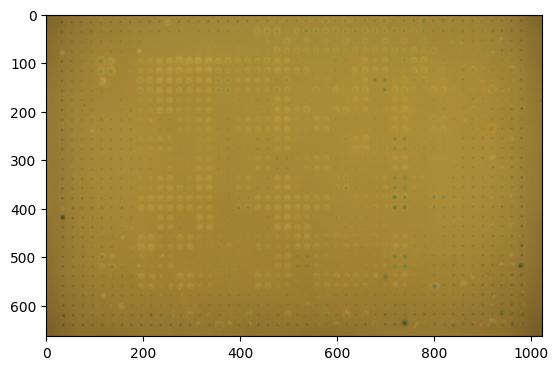

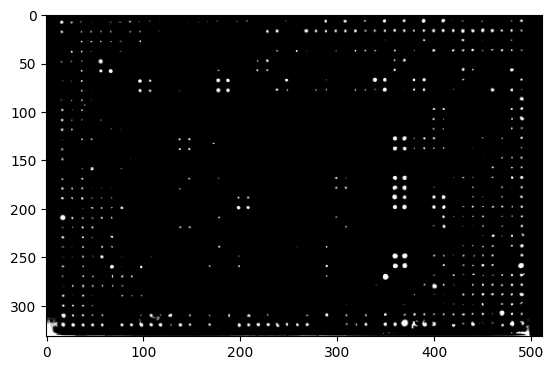

In [8]:
for image, output in experiment.apply_funct(analyze_image, model):
    pass

for image_object in experiment.images:
    show_image(image_object.image)
    show_image(image_object.intensity_map,512)